In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
song_data = pd.read_csv("song_data.csv")

In [ ]:
song_data.describe()

We can see through the number of unique values that there are duplicated songs in the dataset ($18335$ rows, but only $13070$ songs), so we need to  deduplicate the data first in data preprocessing. 

In [ ]:
song_data.nunique().sort_values()

# Data preprocessing

We first drop duplicated rows, and then drop the column of song names, as they are not suitble features (strings) for our purpose of data analysis.

Here we notice that there are $14926$ songs remaining, while there are $13070$ songs. This may indicate different songs with the same name, so we may keep all of them.

   song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  time_signature  audio_valence  
0  167.060               4          0.474  
1  105.256      

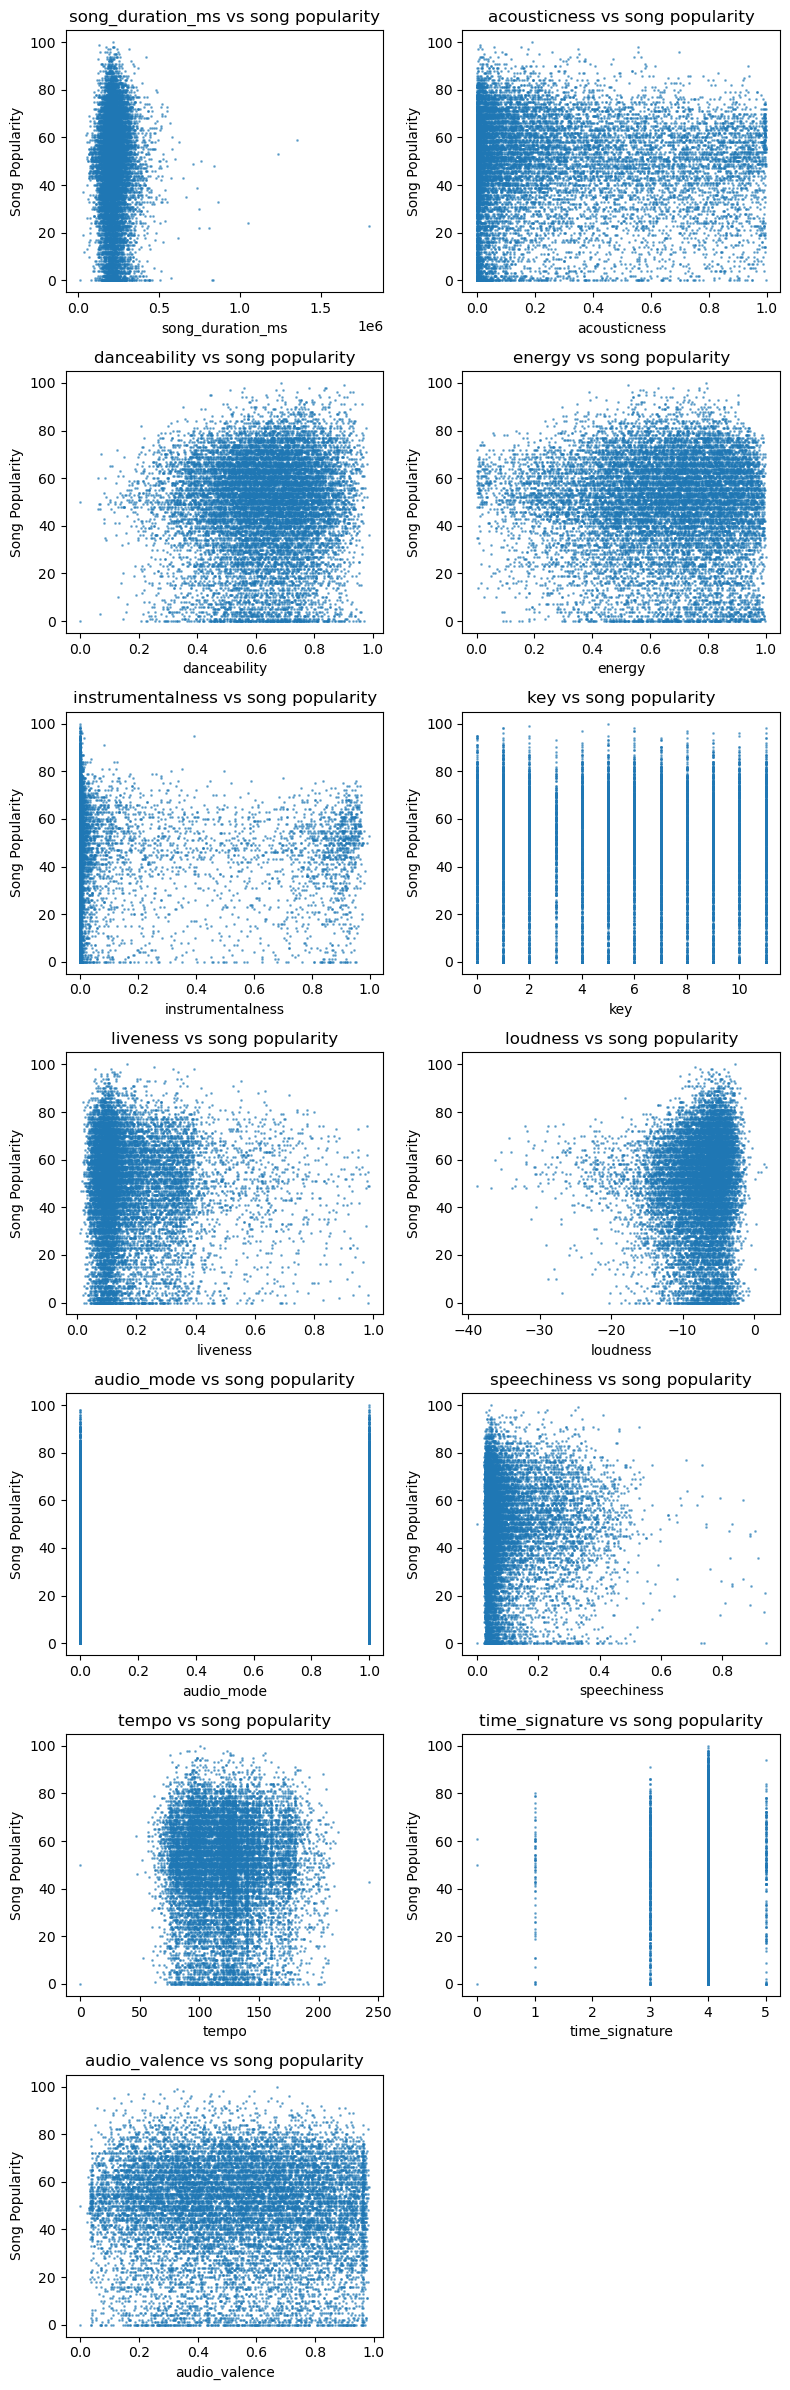

In [9]:
# Drop duplicated rows and remove the 'song_name' column
song_data = song_data.drop_duplicates().drop(columns=['song_name'])
print(song_data.head())

# Features to plot against 'song_popularity'
features = song_data.columns.drop('song_popularity')

# # Create scatter plots for each feature against 'song_popularity'
plt.figure(figsize=(8, 24))
for i, feature in enumerate(features, 1):
    plt.subplot(7, 2, i)  # Create grid of subplots
    plt.scatter(song_data[feature], song_data['song_popularity'], alpha=0.5, s=1)
    plt.title(f'{feature} vs song popularity')
    plt.xlabel(feature)
    plt.ylabel('Song Popularity')
    plt.tight_layout()

plt.show()

## Handling missing data

We can see through below that there is no missing value in all features and outcome. This means that we are free from handling missing valies.

In [10]:
song_data.isna().sum()

song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

## One-hot encoding

Notice that the features key, audio mode, and time signiture are categorical, meaning that the relevant magnitude of the features has no meaning to our model.

Based on the encoding result, at most one of the encoded column for each feature could be $1$. If all the columns corresponding to a column is $0$, then it means that the corresponding one-hot-encoded feature has value $0$.

In [11]:
# Features to one-hot encode
categorical_features = ['key', 'audio_mode', 'time_signature']

# Perform one-hot encoding
song_data_encoded = pd.get_dummies(song_data, columns=categorical_features, drop_first=True)

# Display the first few rows
print(song_data_encoded.head())

# Display the columns after one-hot encoding
features = song_data_encoded.columns.drop("song_popularity")
print(features)

# Overwrite song_data with its one-hot encoded version
song_data_raw = song_data
song_data = song_data_encoded

   song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  liveness  loudness  speechiness    tempo  ...  key_7  \
0          0.000029    0.0589    -4.095       0.0294  167.060  ...  False   
1          0.000000    0.1080    -6.407       0.0498  105.256  ...  False   
2          0.447000    0.2550    -7.828       0.0792  123.881  ...  False   
3          0.003550    0.1020    -4.938       0.1070  122.444  ...  False   
4          0.000000    0.1130    -5.065       0.0313  172.011  ...  False   

   key_8  key_9  key_10  key_11  audio_mode_1  time_signature_1  \
0   True  Fal

In [12]:
# Save the DataFrame to a CSV file
song_data.to_csv('song_data_processed.csv', index=False)
